In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpi
import os
import pandas as pd

## Creating dataset

In [3]:
# 6 channels: 490, 560, 665, 842, 1610, 2190 nm
count_channels = 6
# 5 years and 7 mounth in every year => 7 * 5 = 35
count_files = 35
name_files = [x for x in os.listdir('./') if '.tif' in x] 
images = []
for name_file in name_files:
    images.extend(io.imread(name_file))

In [4]:
images = [x.astype(int) for x in images]

In [5]:
# duplicating name of files for every channel
files = []
for i in range(count_files):
    files.extend([name_files[i]] * count_channels)

In [6]:
np.shape(files)

(210,)

In [7]:
data = {'file': files, 
             'year': [int(x[:4]) for x in files],
           'mounth': [int(x[5:7]) for x in files],
          'channel': [x for x in range(1, count_channels + 1)] * count_files,
            'image': images}

In [8]:
df = pd.DataFrame(data)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   file     210 non-null    object
 1   year     210 non-null    int64 
 2   mounth   210 non-null    int64 
 3   channel  210 non-null    int64 
 4   image    210 non-null    object
dtypes: int64(3), object(2)
memory usage: 8.3+ KB


In [11]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
df

,file,year,mounth,channel,image
0,2019_01.tif,2019,1,1,"[[762, 732, 703, 698, 689, 722, 755, 780, 781,..."
1,2019_01.tif,2019,1,2,"[[951, 887, 845, 827, 836, 873, 913, 978, 993,..."
2,2019_01.tif,2019,1,3,"[[1303, 1231, 1177, 1146, 1155, 1214, 1269, 13..."
3,2019_01.tif,2019,1,4,"[[1889, 1804, 1736, 1659, 1684, 1754, 1818, 19..."
4,2019_01.tif,2019,1,5,"[[2017, 2010, 1991, 1959, 1958, 1987, 2042, 21..."
...,...,...,...,...,...
205,2023_09.tif,2023,9,2,"[[425, 380, 355, 361, 360, 341, 317, 336, 424,..."
206,2023_09.tif,2023,9,3,"[[298, 247, 229, 223, 249, 270, 232, 239, 314,..."
207,2023_09.tif,2023,9,4,"[[1450, 1549, 1553, 1526, 1461, 1414, 1445, 14..."
208,2023_09.tif,2023,9,5,"[[700, 623, 573, 550, 540, 543, 559, 586, 617,..."


In [10]:
df.sort_values(by=["channel","mounth","year"])

,file,year,mounth,channel,image
0,2019_01.tif,2019,1,1,"[[762, 732, 703, 698, 689, 722, 755, 780, 781,..."
42,2020_01.tif,2020,1,1,"[[746, 660, 651, 702, 666, 694, 702, 702, 730,..."
84,2021_01.tif,2021,1,1,"[[7432, 7812, 7956, 7920, 7824, 8000, 8084, 79..."
126,2022_01.tif,2022,1,1,"[[1018, 1082, 1060, 1094, 1040, 941, 996, 988,..."
168,2023_01.tif,2023,1,1,"[[574, 600, 595, 610, 570, 513, 549, 526, 568,..."
...,...,...,...,...,...
41,2019_09.tif,2019,9,6,"[[1210, 1146, 1104, 1083, 1122, 1221, 1368, 15..."
83,2020_09.tif,2020,9,6,"[[1152, 1050, 978, 937, 942, 994, 1014, 1003, ..."
125,2021_09.tif,2021,9,6,"[[846, 818, 801, 795, 808, 840, 900, 989, 1029..."
167,2022_09.tif,2022,9,6,"[[337, 341, 342, 339, 340, 345, 363, 395, 465,..."


In [38]:
df.iloc[167].image - df.iloc[209].image

array([[ -24,   29,   60, ...,   96,   98,   90],
       [ -25,   36,   72, ...,   85,   98,  112],
       [ -48,   -2,   94, ...,   73,  108,  169],
       ...,
       [-317, -322, -333, ...,  901,  699,  240],
       [-336, -339, -349, ...,  881,  732,  390],
       [-367, -381, -402, ...,  832,  793,  684]])

In [37]:
# size of image in every channel
np.shape(df.iloc[0]["image"])

(652, 454)

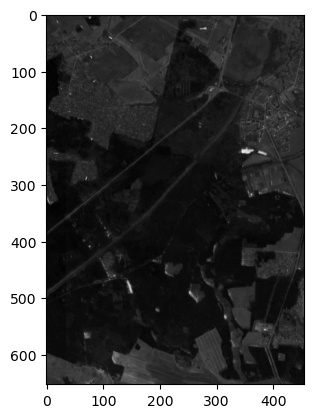

In [44]:
plt.imshow(df.iloc[0].image, cmap='gray')

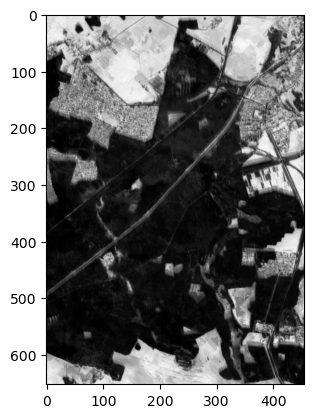

In [83]:
plt.imshow(df.iloc[84].image, cmap='gray')

In [74]:
df.iloc[0]

file                                             2019_01.tif
year                                                    2019
mounth                                                     1
channel                                                    1
image      [[762, 732, 703, 698, 689, 722, 755, 780, 781,...
Name: 0, dtype: object

In [75]:
df.iloc[84]

file                                             2021_01.tif
year                                                    2021
mounth                                                     1
channel                                                    1
image      [[7432, 7812, 7956, 7920, 7824, 8000, 8084, 79...
Name: 84, dtype: object

In [100]:
#сильная разница из-за снега
df.iloc[0].image - df.iloc[84].image

array([[58866, 58456, 58283, ..., 64823, 64988, 64929],
       [58447, 58170, 58091, ..., 64704, 65177, 64567],
       [58417, 58191, 58115, ..., 63901, 64631, 64154],
       ...,
       [57888, 57849, 57864, ...,    75,   129,   100],
       [57944, 58048, 57984, ...,   158,    86,    58],
       [58073, 57968, 58088, ...,   108,    53, 65355]], dtype=uint16)

## Calculation vegetation indexes

P.s. There're 6 channels: 490, 560, 665, 842, 1610, 2190 nm

In [ ]:
10 10 10 10 20 20

In [12]:
df

,file,year,mounth,channel,image
0,2019_01.tif,2019,1,1,"[[762, 732, 703, 698, 689, 722, 755, 780, 781,..."
1,2019_01.tif,2019,1,2,"[[951, 887, 845, 827, 836, 873, 913, 978, 993,..."
2,2019_01.tif,2019,1,3,"[[1303, 1231, 1177, 1146, 1155, 1214, 1269, 13..."
3,2019_01.tif,2019,1,4,"[[1889, 1804, 1736, 1659, 1684, 1754, 1818, 19..."
4,2019_01.tif,2019,1,5,"[[2017, 2010, 1991, 1959, 1958, 1987, 2042, 21..."
...,...,...,...,...,...
205,2023_09.tif,2023,9,2,"[[425, 380, 355, 361, 360, 341, 317, 336, 424,..."
206,2023_09.tif,2023,9,3,"[[298, 247, 229, 223, 249, 270, 232, 239, 314,..."
207,2023_09.tif,2023,9,4,"[[1450, 1549, 1553, 1526, 1461, 1414, 1445, 14..."
208,2023_09.tif,2023,9,5,"[[700, 623, 573, 550, 540, 543, 559, 586, 617,..."


In [109]:
img_2019_07_ch5 = df[(df["year"] == 2019) & (df["mounth"] == 7) & (df["channel"] ==5)]['image'].iloc[0]

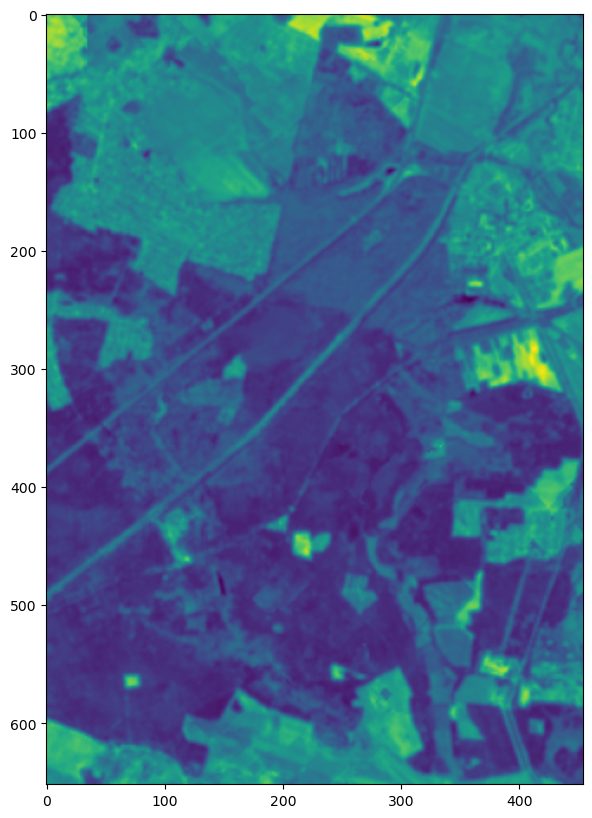

In [110]:
plt.figure(figsize=(15, 10))
plt.imshow(img_2019_07_ch5)

In [ ]:
P.s. There're 6 channels: 490, 560, 665, 842, 1610, 2190 nm

#### Indexes for recognition:

In [114]:
def TVI(ch_550, ch_670, ch_750):
    return (120 * (ch_750 - ch_550) - 200 * (ch_670 - ch_550)) / 2

In [115]:
def MTVI(ch_550, ch_670, ch_800):
    return 1.2 * (1.2 * (ch_800 - ch_550) - 2.5 * (ch_670 - ch_550))

In [123]:
def MTVI2(ch_550, ch_670, ch_800):
    return 1.5 * (1.2 * (ch_800 - ch_550) - 2.5 * (ch_670 - ch_550)) / np.sqrt(
        (2 * ch_800 + 1)**2 - (6 * ch_800 - 5 * np.sqrt(ch_670)) - 0.5 )

In [124]:
def RGI(ch_550, ch_690):
    return ch_690 / ch_550

In [135]:
def GNDVI(ch_550, ch_842):
    return (ch_842 - ch_550) / (ch_842 + ch_550)

In [128]:
def DI1(ch_550, ch_800):
    return ch_800 - ch_550

In [129]:
def PSNВchla(ch_675, ch_800):
    return (ch_800 - ch_675) / (ch_800 + ch_675)

In [130]:
def PSSRa(ch_675, ch_800):
    return ch_800 / ch_675

Доп индексы
https://www.soft.farm/ru/blog/vegetacionnye-indeksy-ndvi-evi-gndvi-cvi-true-color-140

In [132]:
def NDVI(ch_490, ch_842):
    return (ch_842 - ch_490) / (ch_842 + ch_490)

<img src="src/Ndvi_example.jpg">

In [134]:
def EVI(ch_490, ch_665, ch_842):
    return 2.5 * (ch_842 - ch_490) / (ch_842 + 6 * ch_490 - 7.5 * ch_665 + 1)

In [136]:
def CVI(ch_490, ch_560, ch_842):
    return (ch_842 / ch_560) * (ch_490 / ch_560)

## Repairing green band 
#### (For comfortable data processing)

## Show images

In [84]:
image = io.imread("2019_01.tif")

In [85]:
np.shape(image)

(6, 652, 454)

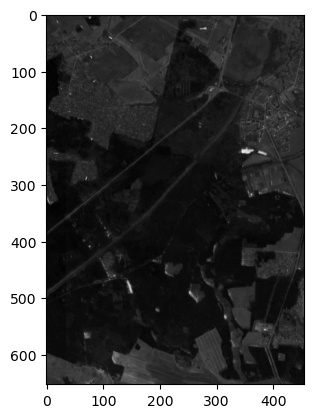

In [86]:
plt.imshow(image[0,::],cmap='gray')

In [97]:
image[0,::]

array([[762, 732, 703, ..., 396, 358, 393],
       [791, 754, 675, ..., 424, 411, 501],
       [729, 715, 675, ..., 453, 468, 582],
       ...,
       [736, 737, 744, ..., 245, 239, 231],
       [736, 736, 744, ..., 267, 232, 212],
       [753, 736, 744, ..., 256, 233, 247]], dtype=uint16)

<Figure size 640x480 with 0 Axes>

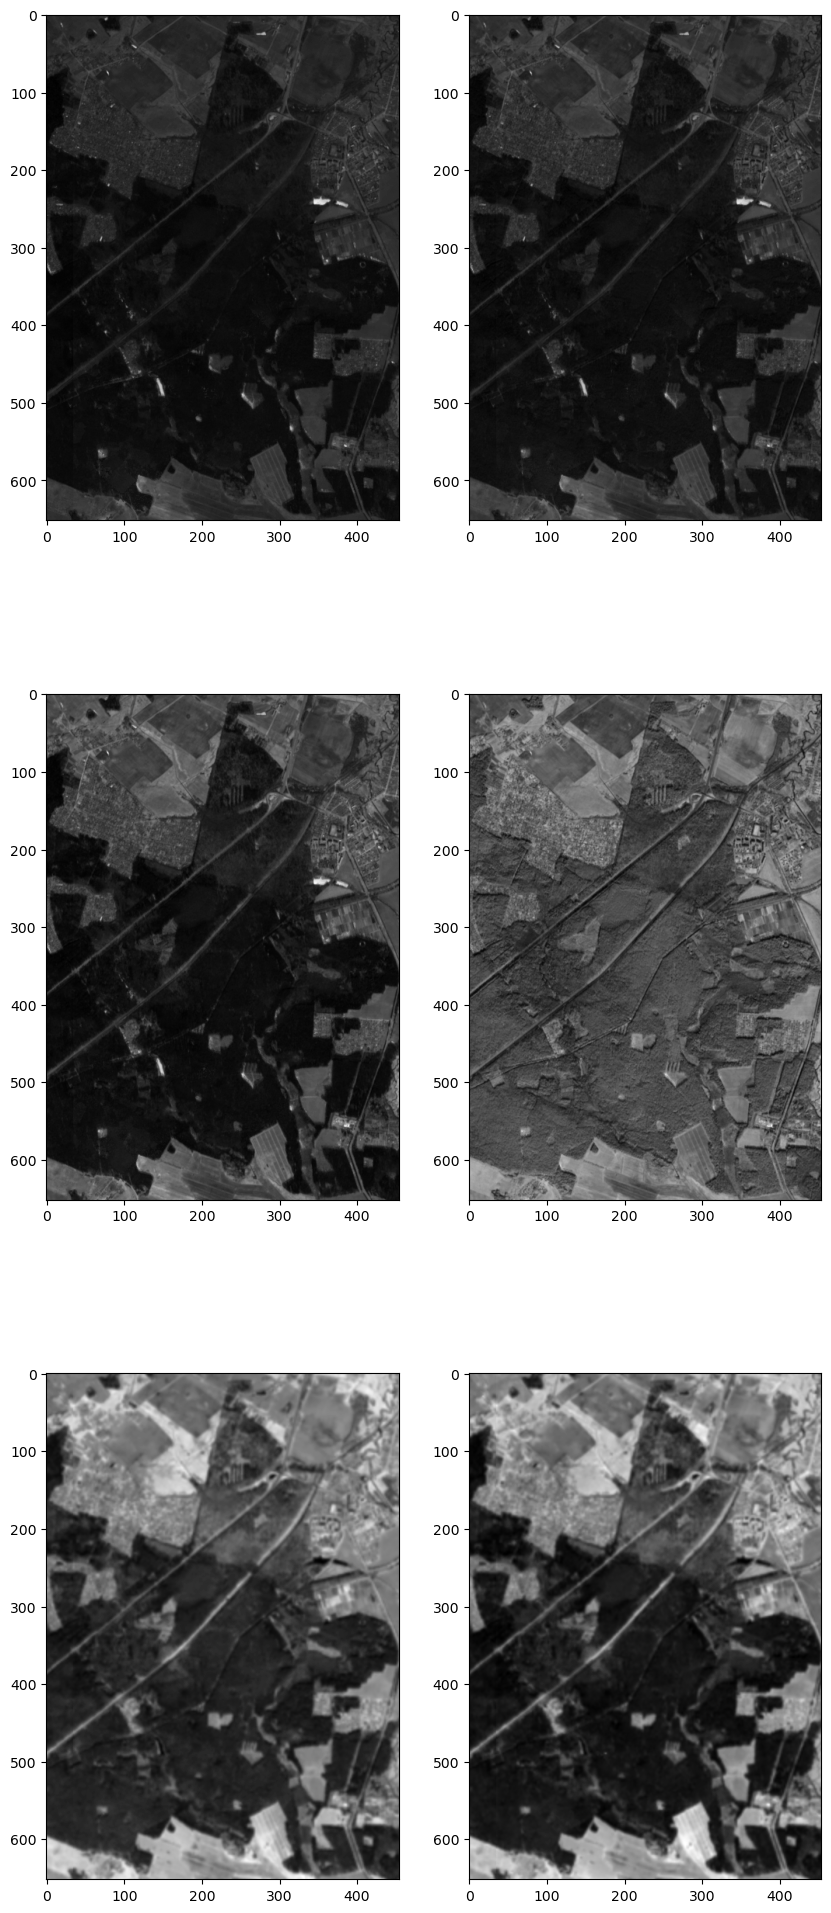

In [98]:
plt.figure()
num_rows=3
num_cols=2
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(figsize=(10,25),nrows=num_rows, ncols=num_cols) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(num_rows):
    for j in range(num_cols):
        axarr[i,j].imshow(image[i*num_cols+j,::],cmap='gray')